In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
import cmath
import math

# Define our buildDataSet function here!

In [127]:
def buildDataSet(max_amplitude, min_sparsity, max_sparsity, vector_size, data_set_size):
    sparse_data = np.zeros((vector_size, data_set_size), dtype=float)  # Ensure float type
    
    # Iterate over the columns of the sparse_data matrix to define the data samples
    for i in range(data_set_size):
        sparsity = random.randint(min_sparsity, max_sparsity)
        indices = random.sample(range(vector_size), sparsity)
        amps = np.random.uniform(-max_amplitude, max_amplitude, sparsity)  # Use negative and positive values
        sparse_data[indices, i] = amps
    
    # Define the DFT matrix and multiply our sparse_data vectors with it to find dense data
    DFT = sp.linalg.dft(vector_size) / np.sqrt(vector_size)
    dense_data = DFT @ sparse_data
    
    return dense_data, sparse_data




## Build the dataset

In [170]:
max_amplitude = 100
min_sparsity = 3
max_sparsity = 5
vector_size = 100
data_set_size = 1000
dense_data, sparse_data = buildDataSet(max_amplitude,min_sparsity,max_sparsity,vector_size,data_set_size)

print(dense_data[:,0])



[ 15.15233219+0.00000000e+00j  -7.87978313+2.80613071e+00j
  -1.90627786+5.88896077e+00j   0.21961909-1.44293525e+01j
   3.86288877+8.71518422e+00j   3.1895565 +1.71606794e+00j
 -12.47955321-1.04332731e+00j   8.357551  -4.39903757e+00j
   2.44930774-4.80474246e-01j  -2.82508614+9.87835626e+00j
  -3.87673379-7.17995574e+00j   1.54066854-3.89885063e+00j
   7.34273648+5.51475011e+00j  -5.81185832+2.11140001e+00j
  -5.5179747 -2.43082061e+00j   8.65963866-5.46561648e+00j
  -0.64735104+4.88846027e+00j  -2.1584479 +6.63392186e+00j
  -4.50056906-1.15616065e+01j   4.7998713 +3.79869223e+00j
   6.71178799+1.10465059e+00j -13.53010712+4.27870122e+00j
   6.60615955-5.53625550e+00j  -0.09159317-5.56764340e+00j
   4.28902276+1.41350023e+01j  -6.68838434-8.46394785e+00j
  -3.4490885 +7.84629666e-01j  13.36288203-3.89108973e+00j
  -9.11271605+7.60357383e+00j   0.57359423+9.52034130e-01j
  -2.57813914-1.16174124e+01j   7.63753367+8.72300922e+00j
  -1.19498203+5.42055632e-01j  -9.56370385+1.89614402e-0

## Test the dataset

In [171]:
DFT = sp.linalg.dft(vector_size)/np.sqrt(vector_size)
iDFT = DFT.conj().T

# Check if the iDFT of the dense data is in fact sparse
print(iDFT@dense_data)


[[-3.69475549e-14+1.30313504e-13j -4.49710076e-13-5.40593016e-14j
  -1.13830871e-13-1.61130447e-14j ... -6.24351033e-14-1.48058413e-14j
  -3.51432294e-14-3.12667292e-14j -4.71820098e-14+1.21958769e-13j]
 [ 1.28122547e-14+3.48339465e-14j -1.22802549e-14+3.66334648e-13j
  -1.08357767e-13+1.33884935e-14j ... -2.12770112e-14+1.46873065e-14j
   2.62815565e-14+5.84661110e-14j  1.47473552e-13+9.55123081e-14j]
 [ 9.77179428e-14+7.04207629e-14j  1.42108547e-13+9.40666960e-14j
  -1.80824248e-14+8.91904551e-14j ...  4.29666497e+01+8.35425225e-14j
  -4.74375696e-14-9.85055902e-14j  8.04069372e-14-1.56180736e-13j]
 ...
 [ 3.40940452e-14-6.32417260e-15j -3.25295923e-14-5.78051690e-14j
   1.27072288e-14+4.06428837e-14j ... -8.53611409e-14-2.66025286e-13j
   6.53736051e-14+1.08744738e-13j -3.97174196e-14-6.47975587e-14j]
 [-2.82830618e-14+3.13836597e-14j -9.84611024e+01+2.80621444e-14j
   9.35166857e-14+4.21105511e-14j ... -3.30402372e-13+7.20504985e-15j
   7.92948024e-15-1.24991623e-13j  4.47469696e-

From the above results, we can see that our vectors are very sparse if we take the IDFT

## Setting up the dataset for Pytorch

In [172]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import train_test_split

print(dense_data.shape)

X = np.concatenate((dense_data.real,dense_data.imag)).T
Y = np.concatenate((dense_data.real,dense_data.imag)).T

X_tensor = torch.tensor(X,dtype=torch.float)
Y_tensor = torch.tensor(Y,dtype=torch.float)
dataset = TensorDataset(X_tensor,Y_tensor)

dataloader = DataLoader(dataset,batch_size = 100,shuffle = True, )
print(X_tensor.shape)

(100, 1000)
torch.Size([1000, 200])


## Setting up the neural network

In [185]:
# class ExponentialComplexLinear(nn.Module):
#     def __init__(self, in_features, out_features):
#         super(ExponentialComplexLinear, self).__init__()
#
#         # Trainable phase angles (real-valued), this is where we are training the q-values) in the context of the exercise
#         self.phases = nn.Parameter(torch.randn(out_features, in_features) * 0.1)  # Small random initialization
#
#     def forward(self, x):
#         # Compute our matrix
#         W = torch.exp(1j * self.phases)  # Enforces |W| = 1
#
#         # Complex matrix multiplication)
#         return torch.matmul(x, W.t())

# class ComplexDecoder(nn.Module):
#     def __init__(self, encoding_dim, output_dim):
#         super(ComplexDecoder, self).__init__()
#
#         self.layers = nn.Sequential(
#             nn.Linear(200,400),
#             nn.ReLU(),
#             nn.Linear(400,400),
#             nn.ReLU(),
#             nn.Linear(400,200),
#             nn.Sigmoid()
#         )
#
#     def forward(self, x):
#         return self.layers(x)


class ComplexLinearUnitary(nn.Module):
    # Notice that the input and output dimensions are half of what the actual vector size is! Because it is a complex value, our dimensions are twice as long
    def __init__(self,input_dim,output_dim):
        super(ComplexLinearUnitary,self).__init__()
        # Here we create the q-values of our unitary matrix. These are the parameters we are training such that each entry of our complex matrix to encode our data is |F_ij| = 1
        self.q_values = nn.Parameter(torch.randn(output_dim,input_dim))

    def forward(self,x):   
        # Compute unitary weights dynamically in each forward pass
        W_real = torch.cos(self.q_values)
        W_imag = torch.sin(self.q_values)
        W_top = torch.cat([W_real, -W_imag], dim=1)  # [W_real, -W_imag]
        W_bottom = torch.cat([W_imag, W_real], dim=1)  # [W_imag, W_real]
        W_total = torch.cat([W_top, W_bottom], dim=0)  # Stack rows to form the full matrix 
        out = torch.matmul(x,W_total.T)
        return out
    
class ComplexLinear(nn.Module):
    # Notice that the input and output dimensions are half of what the actual vector size is! Because it is a complex value, our dimensions are twice as long
    def __init__(self,input_dim,output_dim):
        super(ComplexLinear,self).__init__()
        # Here we create the q-values of our unitary matrix. These are the parameters we are training such that each entry of our complex matrix to encode our data is |F_ij| = 1
        self.W_real = nn.Parameter(torch.randn(output_dim,input_dim))# eye(input_dim))
        self.W_imag = nn.Parameter(torch.randn(output_dim,input_dim)) #zeros((input_dim,output_dim)))

    def forward(self,x):   
        # Compute unitary weights dynamically in each forward pass
        W_real = self.W_real
        W_imag = self.W_imag
        W_top = torch.cat([W_real, -W_imag], dim=1)  # [W_real, -W_imag]
        W_bottom = torch.cat([W_imag, W_real], dim=1)  # [W_imag, W_real]
        W_total = torch.cat([W_top, W_bottom], dim=0)  # Stack rows to form the full matrix 
        out = torch.matmul(x,W_total.T)
        return out

class FeedthroughEncoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(FeedthroughEncoder, self).__init__()
        """ compression_factor = input_dim / encoding_dim
        layer_size_factor = int(encoding_dim * compression_factor / 4) """

        self.encoder = ComplexLinear(input_dim,encoding_dim)

        self.decoder = nn.Sequential(
            ComplexLinear(encoding_dim,input_dim)
        )

    def forward(self, x):
        encoder_out = self.encoder(x)
        return self.decoder(encoder_out)


class LearnedAutoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim,hidden_dims):
        super(LearnedAutoencoder, self).__init__()
        """ compression_factor = input_dim / encoding_dim
        layer_size_factor = int(encoding_dim * compression_factor / 4) """

        self.encoder = ComplexLinearUnitary(input_dim,encoding_dim)
        layers = []
        prev_dim = encoding_dim
        for dim in hidden_dims:
            layers.append(ComplexLinear(prev_dim,dim))
            layers.append(nn.ReLU())
            prev_dim = dim
        self.decoder = nn.Sequential(
            *layers,
            ComplexLinear(prev_dim,input_dim)
        )

    def forward(self, x):
        encoder_out = self.encoder(x)
        return self.decoder(encoder_out)

# class LearnedAutoencoder(nn.Module):
#     def __init__(self, input_dim, encoding_dim):
#         super(LearnedAutoencoder, self).__init__()
#         compression_factor = input_dim / encoding_dim
#         layer_size_factor = int(encoding_dim * compression_factor / 4)
#
#         self.encoder = nn.Sequential(
#             nn.Linear(input_dim, 15),
#             nn.ReLU(),
#             nn.Linear(17, 15),
#             nn.ReLU(),
#             nn.Linear(15, 12),
#             nn.ReLU(),
#             nn.Linear(12, 10),
#         )
#         self.decoder = nn.Sequential(
#             nn.Linear(10, 12),
#             nn.ReLU(),
#             nn.Linear(12, 15),
#             nn.ReLU(),
#             nn.Linear(15, 17),
#             nn.ReLU(),
#             nn.Linear(17, input_dim),
#             nn.ReLU()
#         )
#
#     def forward(self, x):
#         encoder_out = self.encoder(x)
#         return self.decoder(encoder_out)


## Training the feedthrough model

Epoch 1, Loss: 1995190.625000
Epoch 2, Loss: 1401678.500000
Epoch 3, Loss: 1046209.250000
Epoch 4, Loss: 653437.125000
Epoch 5, Loss: 508314.781250
Epoch 6, Loss: 325735.562500
Epoch 7, Loss: 258650.390625
Epoch 8, Loss: 196429.984375
Epoch 9, Loss: 169481.390625
Epoch 10, Loss: 111678.320312
Epoch 11, Loss: 100097.726562
Epoch 12, Loss: 70414.531250
Epoch 13, Loss: 54656.820312
Epoch 14, Loss: 46889.433594
Epoch 15, Loss: 37853.328125
Epoch 16, Loss: 32830.347656
Epoch 17, Loss: 25868.339844
Epoch 18, Loss: 24229.871094
Epoch 19, Loss: 21277.783203
Epoch 20, Loss: 16504.357422
Epoch 21, Loss: 13404.004883
Epoch 22, Loss: 11205.759766
Epoch 23, Loss: 9552.635742
Epoch 24, Loss: 8528.477539
Epoch 25, Loss: 7340.616699
Epoch 26, Loss: 6610.880371
Epoch 27, Loss: 6013.656738
Epoch 28, Loss: 4830.670410
Epoch 29, Loss: 4453.570801
Epoch 30, Loss: 3830.690430
Epoch 31, Loss: 3699.719482
Epoch 32, Loss: 3149.691406
Epoch 33, Loss: 2758.242676
Epoch 34, Loss: 2323.208008
Epoch 35, Loss: 2134.

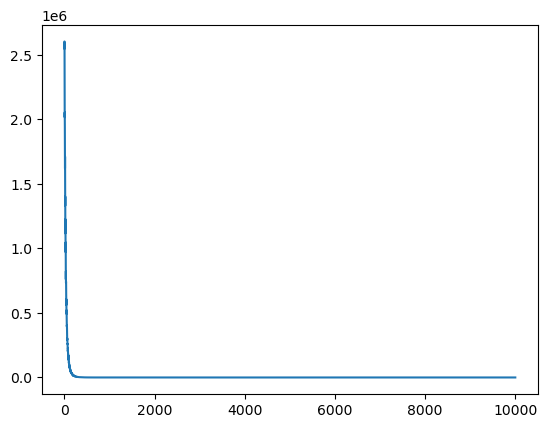

In [186]:
# Define the size of our "measurement" vector as encoding_dim. This needs to be larger than the sparsity of our matrix

# encoding_dim = max_sparsity
# encoding_dim = 100
# vector_size = 100
encoding_dim = vector_size
# Initialize model
feedthrough_model = FeedthroughEncoder(vector_size, encoding_dim)
optimizer = torch.optim.Adam(feedthrough_model.parameters(), lr=1E-2, weight_decay=1E-6)
loss_fn = nn.MSELoss()

# def complex_mse_loss(input, target):
#     return F.mse_loss(input, target)

# Training loop
losses = []
for epoch in range(1000):
    for batch in dataloader:
        inputs, targets = batch  # Unpack the tuple
        optimizer.zero_grad()
        output = feedthrough_model(inputs)
        loss = loss_fn(output, targets)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    print(f"Epoch {epoch+1}, Loss: {loss.item():.6f}")

plt.plot(losses)
plt.show()

In [184]:
print(output[-1] - targets[-1])


tensor([ 0.6988,  1.3516, -0.1712, -0.3172,  0.0140,  3.6067, -0.7864, -0.3462,
         1.2495, -0.4690, -0.2693, -1.1917,  0.9650, -1.1128,  1.4823, -3.4012,
        -0.5027,  2.3304, -0.8122,  1.1808, -0.9414,  0.8253, -1.5041,  1.9589,
        -0.1616,  0.9015, -2.0108,  1.8336, -1.7755,  0.4954,  0.2031, -2.5607,
         0.3527, -0.3943,  1.6107,  2.4322, -0.4900,  1.6523, -1.3066,  0.5015,
         0.1288, -1.3380,  0.6971, -0.4001,  0.3786,  1.8353, -1.4285, -1.3327,
         0.0299, -1.9745,  1.2547,  1.4374, -1.0107,  1.0100, -1.2316,  1.1691,
        -1.5613, -0.0145,  0.3060,  0.8939,  1.2171, -1.4980,  0.0482,  0.3395,
        -1.7579, -0.0730,  0.9039,  0.4166, -2.1665,  2.0049,  0.7215, -0.7211,
        -1.1861, -2.4410, -1.2950, -0.7688, -3.0761, -1.4509,  0.0089, -0.8716,
        -0.9728, -0.7225, -0.1061, -0.7201, -1.9811, -0.2719, -1.6975,  0.8401,
        -0.9327,  0.1920, -1.8604,  1.6727, -0.2389, -0.4340, -1.5796, -0.0181,
         0.7677,  0.6528, -1.0531, -0.07

In [ ]:
q = feedthrough_model.encoder.q_values.detach()
print(np.exp(1j*q)@np.exp(1j*q))

tensor([[ 8.0330-7.3163j,  4.8749-14.8155j, 14.4008+0.6539j,  ...,
         24.4794+1.5628j, 15.1048-16.6708j, 17.3649-6.2229j],
        [12.8862-3.3851j, 10.9463-7.6871j, 12.8554+10.5322j,  ...,
         11.6295+13.2492j,  5.5376+8.2202j, 17.9620-2.0988j],
        [-2.1838-0.7329j, 13.1625+2.1029j,  0.3667-3.5183j,  ...,
          4.1790+1.3569j,  3.4555+1.7847j, -0.5061+5.2427j],
        ...,
        [17.0018-8.7187j, 19.7375-5.4338j, 14.3486-8.3617j,  ...,
         15.2867+3.7308j,  8.0685-16.8050j, 23.8317-5.4186j],
        [ 1.3224+11.7595j, 14.0660-3.4124j, 11.7481-2.3061j,  ...,
          7.4711+7.1211j,  7.3740+0.1672j,  3.9537-6.0214j],
        [ 9.6746-3.0172j, 21.3377-2.3186j, 13.8046-16.4322j,  ...,
         18.3429-4.7737j, 19.2897-5.1014j,  9.5945+6.7129j]])


C:\Users\tomli\AppData\Local\Temp\ipykernel_23912\1292000257.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  print(np.exp(1j*q)@np.exp(1j*q))


## Train the AutoEncoder Model

Epoch 1, Loss: 655701049344.000000
Epoch 2, Loss: 492191547392.000000
Epoch 3, Loss: 630693691392.000000
Epoch 4, Loss: 478717050880.000000
Epoch 5, Loss: 343314923520.000000
Epoch 6, Loss: 307792969728.000000
Epoch 7, Loss: 319203540992.000000
Epoch 8, Loss: 221922672640.000000
Epoch 9, Loss: 221633298432.000000
Epoch 10, Loss: 161714208768.000000
Epoch 11, Loss: 157593632768.000000
Epoch 12, Loss: 162257960960.000000
Epoch 13, Loss: 150152069120.000000
Epoch 14, Loss: 143549906944.000000
Epoch 15, Loss: 127741214720.000000
Epoch 16, Loss: 125981900800.000000
Epoch 17, Loss: 110322032640.000000
Epoch 18, Loss: 105962971136.000000
Epoch 19, Loss: 124022145024.000000
Epoch 20, Loss: 107513085952.000000
Epoch 21, Loss: 93338509312.000000
Epoch 22, Loss: 90065600512.000000
Epoch 23, Loss: 88011595776.000000
Epoch 24, Loss: 79818178560.000000
Epoch 25, Loss: 81191944192.000000
Epoch 26, Loss: 66584809472.000000
Epoch 27, Loss: 62970085376.000000
Epoch 28, Loss: 63285485568.000000
Epoch 29,

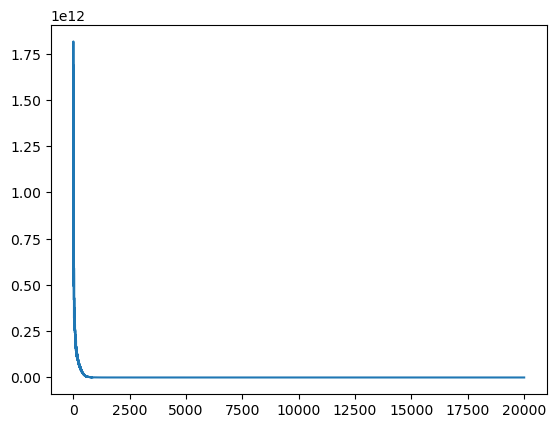

In [195]:
encoding_dim = 50
# Initialize model
hidden_dims = np.array([100,140,180])
autoencoder_model = LearnedAutoencoder(vector_size,encoding_dim,hidden_dims)
optimizer = torch.optim.Adam(autoencoder_model.parameters(), lr=1E-3, betas=(0.9,0.999),weight_decay=1E-6)
loss_fn = nn.MSELoss()

# def complex_mse_loss(input, target):
#     return F.mse_loss(input, target)

# Training loop
losses = []
for epoch in range(2000):
    for batch in dataloader:
        inputs, targets = batch  # Unpack the tuple
        optimizer.zero_grad()
        output = autoencoder_model(inputs)
        loss = loss_fn(output, targets)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    print(f"Epoch {epoch+1}, Loss: {loss.item():.6f}")

plt.plot(losses)
plt.show()

## Compare inputs and outputs

In [192]:
#print(output[0,:])
#print(targets[0,:])
print(targets[0,:].size())
print(output[0,:])
# targets_np = np.array(targets.detach())
# output_sample = output_np[7,:]
# targets_sample = targets_np[7,:]
# print(output_sample)

h_real,h_imag = np.split(output_sample,2)
h_hat = h_real + 1j*h_imag

torch.Size([200])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], grad_fn=<SliceBackward0>)
